In [1]:
from sklearn.linear_model import (
    LinearRegression,
    RidgeCV,
    BayesianRidge,
    Ridge,
    ElasticNetCV,
    ElasticNet,
    Lasso,
    LassoCV,
    LarsCV,
    LassoLarsCV,
    SGDRegressor,
    TheilSenRegressor,
    RANSACRegressor,
)
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold, RepeatedKFold, StratifiedKFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from tqdm.notebook import tqdm
from pathlib import Path

INPUT_PATH = Path("/mnt/storage_dimm2/kaggle_data/commonlitreadabilityprize")
OUTPUT_PATH = Path("/mnt/storage_dimm2/kaggle_output/commonlitreadabilityprize")

In [2]:
model_folders = [
    # cherubic-nifty-serval - deberta-large - 0.4836
    "20210614-173633",
    "20210614-203831",
    "20210614-234025",
    "20210615-024138",
    "20210615-054256",
    # scrupulous-mink-of-amplitude - deberta-base - 0.4934
    "20210615-084357",
    "20210615-094729",
    "20210615-105329",
    "20210615-120001",
    "20210615-130640",
    # notorious-sticky-gibbon - roberta-base (with hidden) - 0.4961
    "20210615-220146",
    "20210615-225055",
    "20210615-234038",
    "20210616-003038",
    "20210616-012048",
    # fortunate-cherry-mandrill - roberta-large - 0.4890
    "20210616-021135",
    "20210616-041221",
    "20210616-060255",
    "20210616-075451",
    "20210616-094506",
    # mottled-certain-caracal - distilroberta-base - 0.5076
    "20210616-113626",
    "20210616-121203",
    "20210616-124738",
    "20210616-132341",
    "20210616-140300",
    # aspiring-classic-pegasus - funnel - 0.4975
    "20210617-083847", 
    "20210617-102611", 
    "20210617-120949", 
    "20210617-135233", 
    "20210617-153459", 
    # silver-bumblebee-of-attack - roberta-base - 0.4932
    "20210617-223340",
    "20210617-232650",
    "20210618-002022",
    "20210618-011405",
    "20210618-020751",
    # sloppy-resourceful-tanuki - albert-large - 0.5241
    "20210617-225903",
    "20210618-010302",
    "20210618-030706",
    "20210618-051049",
    "20210618-071437",
    # rustling-quirky-mastodon - bert-base-uncased - 0.5136
    "20210618-082756",
#     "20210618-092115",  # Only 4 ckpts
    "20210618-100526",
    "20210618-105909",
    "20210618-115253",
    # perky-defiant-husky - bert-large-uncased - 0.5287
    "20210618-124637",
    "20210618-144213",
    "20210618-163942",
    "20210618-183719",
    "20210618-203441",
    # gregarious-brass-perch - bart-base - 0.5445
    "20210618-223208",
    "20210618-233614",
    "20210619-004022",
    "20210619-014809",
    "20210619-025421",
    # military-firefly-of-apotheosis - bart-large - 0.5301
    "20210619-035747",
    "20210619-064351",
    "20210619-093050",
    "20210619-121916",
    "20210619-150740",
    # eccentric-lemur-of-tenacity - sentence-transformers/LaBSE - 0.5230
    "20210622-152356",
    "20210622-161822",
    "20210622-171312",
    "20210622-181238",
    "20210622-191326",
    # valiant-chameleon-of-chaos - sentence-transformers/bert-base-nli-cls-token - 0.5288
    "20210622-165808",
    "20210622-174555",
    "20210622-183427",
    "20210622-192221",
    "20210622-201127",
    # nonchalant-quaint-termite - roberta-base - 0.4951
    "20210623-093223",
    "20210623-101956",
    "20210623-110954",
    "20210623-120004",
    "20210623-125025",
    # skilled-smart-crane - deberta-large (new seeds) - 0.4758
    "20210623-105940",
    "20210623-140343",
    "20210623-170657",
    "20210623-201514",
    "20210623-232231",
    # winged-cerise-agouti - roberta-large - 0.4986
    "20210623-134115",
    "20210623-153240",
    "20210623-172217",
    "20210623-191151",
    "20210623-210342",
    # swift-of-amazing-pride - distilroberta-base - 0.5053
    "20210623-225426",
    "20210623-233019",
    "20210624-000706",
    "20210624-004429",
    "20210624-012102",
    # independent-discerning-earthworm - albert-large-v2
    "20210624-015812",
    "20210624-040309",
    "20210624-060838",
    "20210624-081317",
    "20210624-101855",
    # discreet-visionary-seahorse - microsoft/deberta-base - 0.5181
    "20210624-023057",
    "20210624-033624",
    "20210624-044356",
    "20210624-055212",
    "20210624-070123",
    # chirpy-wren-of-unity - funnel-transformer/large-base - 0.5000
    "20210624-081031",
    "20210624-095223",
    "20210624-113506",
    "20210624-131927",
    "20210624-150250",
    # free-ebony-fennec - microsoft/deberta-base - 0.5021
    "20210627-105133",
    "20210627-115742",
    "20210627-130650",
    "20210627-141604",
    "20210627-152616",
    # blond-viper-of-discussion - deepset/roberta-base-squad2 - 0.4900
    "20210627-105144",
    "20210627-114225",
    "20210627-123605",
    "20210627-133047",
    "20210627-142510",
    # meticulous-demonic-kakapo - roberta-large - 0.5030
    "20210627-151904",
    "20210627-171236",
    "20210627-190737",
    "20210627-210244",
    "20210627-225949",
    # fat-glorious-badger - deepset/roberta-large-squad2 - 0.4937
    "20210628-005835",
    "20210628-025632",
    "20210628-045559",
    "20210628-065437",
    "20210628-085322",
    # beautiful-denim-monkey - funnel-transformer/large-base - 0.5066
    "20210627-163614",
    "20210627-181626",
    "20210627-195827",
    "20210627-213946",
    "20210627-232205",
    # solid-zebu-of-happiness - albert-large-v2 - 0.5207
    "20210628-010737",
    "20210628-031447",
    "20210628-052149",
    "20210628-072849",
    "20210628-093543",
    # parrot-of-strange-maturity - sentence-transformers/LaBSE - 0.5286
    "20210628-114738",
    "20210628-125350",
    "20210628-135845",
    "20210628-150440",
    "20210628-161040",
    # greedy-dog-of-holiness - microsoft/deberta-large - 0.4756
    "20210628-114736",
    "20210628-145921",
    "20210628-181426",
    "20210628-212819",
    "20210629-004241",
    # truthful-hissing-waxbill - deepset/sentence_bert - 0.5504
    "20210628-171705",
    "20210628-180837",
    "20210628-190059",
    "20210628-195246",
    "20210628-204527",
    # blazing-natural-husky - bert-large-cased-whole-word-masking - 0.5202
    "20210628-213743",
    "20210628-233312",
    "20210629-012726",
    "20210629-032224",
    "20210629-051503",
    # ludicrous-heron-of-genius - bert-large-cased
    "20210629-035901",
    "20210629-055338",
    "20210629-074730",
    "20210629-094209",
    "20210629-113421",
    # cooperative-mink-of-spirit - xlm-roberta-base
    "20210629-081350",
    "20210629-091723",
    "20210629-102123",
    "20210629-112540",
    "20210629-122949",
    # dangerous-nebulous-horse - xlm-roberta-large - 0.5092
    "20210629-133352",
    "20210629-154453",
    "20210629-183058",
    "20210629-203803",
    "20210629-224305",
    # passionate-sexy-slug - bart-base - 0.5325
    "20210629-132611",
    "20210629-142628",
    "20210629-152921",
    "20210629-163239",
    "20210629-183052",
    # fascinating-lavender-turaco - electra-large - 
    "20210705-091644",
    # simple-sensible-bear - electra-large - 
    "20210705-143109",
    "20210705-162253",
    "20210705-181532",
    "20210705-200803",
    "20210705-215844",
]

print(len(model_folders))

dataset_paths = [OUTPUT_PATH / f for f in model_folders]

180


In [3]:
mpaths, oof_paths = [], []
for p in dataset_paths:
    mpaths.append(sorted(list(p.glob(f"*/*/*.ckpt"))))
    oof_paths.extend(sorted(list(p.glob(f"*.csv"))))
    
len(model_folders), len(oof_paths)

(180, 180)

In [4]:
oofs = pd.read_csv(INPUT_PATH / "train.csv", usecols=["id", "target", "standard_error"]).sort_values(
        by="id"
    )
for i, (p, f) in enumerate(zip(oof_paths, model_folders)):
    x = pd.read_csv(p).sort_values(by="id")
    oofs[f] = x["prediction"].values

# pred_cols = [f"model_{i}" for i in range(len(mpaths))]
pred_cols = model_folders

print(len(pred_cols))
    
oofs.head()

180


,id,target,standard_error,20210614-173633,20210614-203831,20210614-234025,20210615-024138,20210615-054256,20210615-084357,20210615-094729,...,20210629-142628,20210629-152921,20210629-163239,20210629-183052,20210705-091644,20210705-143109,20210705-162253,20210705-181532,20210705-200803,20210705-215844
1279,000accf7e,-2.002055,0.497274,-2.174165,-2.305160,-2.451190,-2.505858,-2.490587,-2.264506,-2.664520,...,-2.468730,-2.884780,-2.452014,-2.379550,-2.105954,-2.120910,-2.313522,-2.249356,-2.142179,-2.411627
2185,001ef05a9,0.841000,0.492411,0.669889,0.569387,0.472606,0.514734,0.493645,0.528904,0.495011,...,0.530472,0.351958,-0.222108,0.056212,0.409658,0.448582,0.376331,0.244449,0.363987,0.592331
332,00589d631,-2.195109,0.520239,-1.908255,-1.930197,-2.064695,-2.545308,-2.129548,-2.160540,-2.234235,...,-1.862743,-1.684532,-1.590188,-1.733277,-2.298518,-2.012025,-2.221498,-1.542567,-1.987585,-1.965944
72,0060c36b9,-1.333456,0.492384,-1.098570,-1.134784,-1.161226,-1.260594,-1.139692,-0.983574,-1.220255,...,-0.811296,-0.734002,-1.149290,-0.953325,-0.901521,-0.880229,-0.890253,-0.945758,-0.861552,-0.739160
2694,00d4d251d,0.088764,0.463817,-0.226934,-0.034609,-0.219147,-0.192564,0.082993,-0.454333,-0.133543,...,-0.327062,-0.482454,-0.056052,-0.252370,0.106675,0.220040,-0.146457,-0.186607,-0.007790,0.365790


In [5]:
oofs.describe()

,target,standard_error,20210614-173633,20210614-203831,20210614-234025,20210615-024138,20210615-054256,20210615-084357,20210615-094729,20210615-105329,...,20210629-142628,20210629-152921,20210629-163239,20210629-183052,20210705-091644,20210705-143109,20210705-162253,20210705-181532,20210705-200803,20210705-215844
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,...,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,-0.948092,-0.939186,-0.936123,-0.968496,-0.958907,-0.891844,-0.910382,-0.932254,...,-0.855846,-0.789732,-0.877770,-0.833569,-0.932848,-0.872859,-0.897710,-0.894947,-0.891151,-0.888286
std,1.033579,0.034818,0.912312,0.889185,0.913707,0.930968,0.905059,0.907261,0.927470,0.911461,...,0.864103,0.916784,0.850334,0.857225,0.884439,0.945038,0.906948,0.944194,0.917095,0.951947
min,-3.676268,0.000000,-3.560785,-3.392829,-3.732013,-3.534283,-3.483280,-3.612729,-3.607502,-3.599687,...,-3.367808,-3.498556,-3.496688,-3.676754,-3.565835,-3.439724,-3.336777,-3.368554,-3.633597,-3.693785
25%,-1.690320,0.468543,-1.613250,-1.570393,-1.616401,-1.659845,-1.625832,-1.550567,-1.581456,-1.592230,...,-1.493594,-1.447201,-1.479983,-1.466526,-1.579139,-1.561720,-1.552959,-1.590229,-1.547670,-1.577691
50%,-0.912190,0.484721,-0.900925,-0.891787,-0.904669,-0.926716,-0.913854,-0.845645,-0.853657,-0.858941,...,-0.795642,-0.717472,-0.838576,-0.770964,-0.878935,-0.834138,-0.868300,-0.842094,-0.842595,-0.822021
75%,-0.202540,0.506268,-0.242909,-0.258008,-0.232878,-0.260776,-0.254002,-0.191775,-0.206128,-0.229850,...,-0.180738,-0.084332,-0.220815,-0.174148,-0.239423,-0.132191,-0.180298,-0.143965,-0.174106,-0.135787
max,1.711390,0.649671,1.249225,1.150385,1.232993,1.288711,1.167053,1.241939,1.432130,1.164523,...,1.152027,1.325483,1.126063,1.355190,1.233232,1.302636,1.308697,1.139242,1.224019,1.148970


In [6]:
# oofs.loc[:, pred_cols].clip(oofs["target"].min(), oofs["target"].max(), inplace=True)

In [7]:
reg = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100, 500, 1000), normalize=False)
reg.fit(oofs[pred_cols], oofs["target"])
print(f"Best score: {np.sqrt(-reg.best_score_):0.5f}. Alpha {reg.alpha_}")
reg.coef_

Best score: 0.45036. Alpha 500.0


array([ 0.01830146,  0.00067269,  0.01129416,  0.0057752 ,  0.01184892,
       -0.00118782,  0.02079698, -0.00603496,  0.00384842, -0.00089994,
        0.00705054,  0.0134446 ,  0.01304051, -0.00323571,  0.00763629,
        0.00509187,  0.02779448,  0.01871201,  0.0162065 ,  0.01114833,
        0.01139087, -0.00476156,  0.00841927,  0.01429674, -0.00075113,
        0.00901304,  0.02078897,  0.0205075 ,  0.03123018,  0.00737946,
        0.00895076,  0.00988481,  0.00889115,  0.00212905, -0.00703363,
       -0.00136044,  0.01654246,  0.0160893 ,  0.01015642, -0.00699022,
        0.00384021,  0.00047939,  0.00865431, -0.00521424, -0.00119264,
       -0.00073535, -0.0007675 , -0.0087142 , -0.01231637,  0.01023273,
       -0.00504376, -0.02934392, -0.01069547, -0.00356686, -0.02731294,
       -0.0121588 , -0.00128912, -0.01061177, -0.00765927,  0.0136596 ,
        0.01113609,  0.00898036, -0.00142107,  0.0104599 , -0.00821533,
       -0.00057168, -0.00375892,  0.00391091,  0.00197398,  0.00

In [8]:
# corr = oofs[pred_cols].corr()

# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.9, vmax=1.0, # center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5});

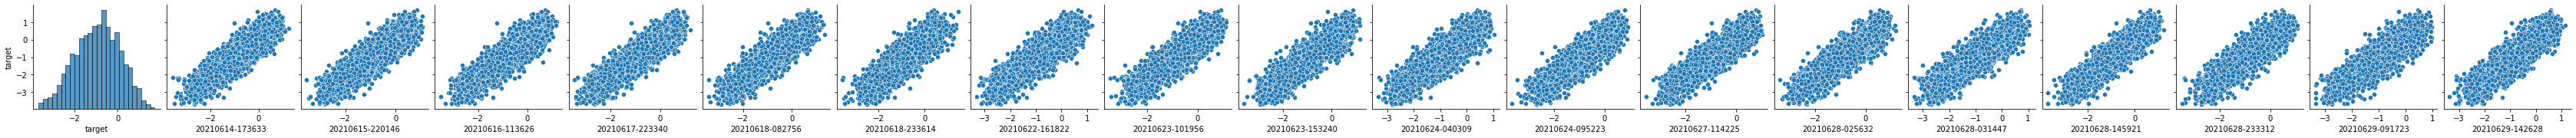

In [9]:
sns.pairplot(oofs, y_vars=["target"], x_vars=["target"] + pred_cols[::10]);

In [10]:
scores = cross_val_score(
#     LinearRegression(),
    Ridge(alpha=100),
#     KernelRidge(alpha=100, kernel="rbf"),
#     BaggingRegressor(n_estimators=100),
#     Lasso(),
    oofs[pred_cols],
    oofs["target"],
    scoring="neg_mean_squared_error",
#     cv=LeaveOneOut(),
    n_jobs=-1,
)
print(f"Best score: {np.sqrt(np.mean(-scores)):0.5f}")

Best score: 0.45035


In [11]:
# # reg = LassoCV(max_iter=5000, cv=LeaveOneOut(), n_jobs=-1)  # 0.45689
# reg = ElasticNetCV(l1_ratio=[0.01, 0.05, .1, .5, .7, .9, .95, .99, 1], max_iter=5000, n_jobs=-1, tol=1e-5)  # 0.45619

# reg.fit(oofs[pred_cols], oofs["target"])
# # print(f"Best score: {np.sqrt(reg.mse_path_[-1].mean()):0.5f}")
# print(reg.l1_ratio_)

# np.sqrt(reg.mse_path_[1, -1].mean())

# Brute force model selection

In [12]:
# def powerset(iterable):
#     "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#     s = list(iterable)  # allows duplicate elements
#     return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

# subsets = list(powerset(pred_cols))
# len(subsets)

In [13]:
# best_score = 10
# best_cols = None

# for s in tqdm(subsets[1:]):
#     reg = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100, 500, 1000))
#     reg.fit(oofs[list(s)], oofs["target"])
#     score = np.sqrt(-reg.best_score_)
    
#     if score < best_score:
#         best_score = score
#         best_cols = list(s)
        
# print(f"Best score: {best_score:0.5f}")
# print("Best cols", best_cols)

In [14]:
# ['model_1', 'model_2', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_11', 'model_13', 'model_16']

# Hill climbing

In [15]:
# https://www.kaggle.com/abhishek/step-1-create-folds
def create_folds(data, y, n_splits=5, random_state=None):
    data = data.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # calculate number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, "bins"] = pd.cut(y, bins=num_bins, labels=False)

    # initiate the kfold class from model_selection module
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    splits = []

    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        splits.append((t_, v_))
        
    return splits

In [16]:
def get_score(X, y):
#         reg = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 100, 500, 1000), normalize=True)
#         reg.fit(X, y)
#         return np.sqrt(-reg.best_score_)
    reg = LassoCV(
        max_iter=10000,
        random_state=48,
        n_jobs=-1,
        normalize=True,
        tol=1e-5,
#         cv=RepeatedKFold(random_state=48),
        cv=create_folds(X, y, random_state=48),
    ).fit(X, y)
    return np.sqrt(reg.mse_path_)[-1].mean()


def averaging(X, y):
    y_pred = X.mean(1)
    return np.sqrt(mean_squared_error(y_pred, y))

In [17]:
def get_size(folder):
    # Ubuntu uses 1000**3, Kaggle use 1024**3
    return sum(f.stat().st_size for f in (OUTPUT_PATH / folder).rglob('*') if f.is_file()) / 1024**3


def get_model_name(folder):
    for f in (OUTPUT_PATH / folder).rglob('*.yaml'):
        with open(f, "r") as ymlfile:
            cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
            return cfg["model_name"]
        
        
def get_rmse(folder):
    return np.sqrt(mean_squared_error(oofs[folder], oofs["target"]))

In [18]:
# candidates = model_folders.copy()

# best_score = np.inf
# selection = []
# # tol = 0.00001
# tol = 0
# y = oofs["target"]
# storage = 0

# # Find best initial model
# initial_scores = [np.sqrt(mean_squared_error(oofs[c], oofs["target"])) for c in candidates]
# idx = np.argmin(initial_scores)
# best_score = initial_scores[idx]
# selection.append(candidates[idx])
# storage += get_size(candidates[idx])
# print(f"Initial {candidates[idx]}. Score {best_score:0.5f}. {storage:0.1f} GB")
# del candidates[idx]


# while storage < 120:
#     scores = [get_score(oofs[selection + [c]], y) for c in candidates]

#     idx = np.argmin(scores)
#     if scores[idx] < best_score - tol:
#         best_score = scores[idx]
#         selection.append(candidates[idx])
#         storage += get_size(candidates[idx])
#         print(f"Added {candidates[idx]}. New best score {best_score:0.5f}. {storage:0.1f} GB")
#         del candidates[idx]
#     else:
#         break
        
# print(len(selection), "models selected")
        
# selection

# Netflix method

https://kaggler.readthedocs.io/en/latest/_modules/kaggler/ensemble/linear.html#netflix

https://www.netflixprize.com/assets/GrandPrize2009_BPC_BigChaos.pdf

In [19]:
# https://kaggler.readthedocs.io/en/latest/_modules/kaggler/ensemble/linear.html#netflix
def netflix(es, ps, e0, l=.0001):
    """Combine predictions with the optimal weights to minimize RMSE.

    Ref: Töscher, A., Jahrer, M., & Bell, R. M. (2009). The bigchaos solution to the netflix grand prize.

    Args:
        es (list of float): RMSEs of predictions
        ps (list of np.array): predictions
        e0 (float): RMSE of all zero prediction
        l (float): lambda as in the ridge regression

    Returns:
        (tuple):

            - (np.array): ensemble predictions
            - (np.array): weights for input predictions
    """
    m = len(es)
    n = len(ps[0])

    X = np.stack(ps).T
    pTy = .5 * (n * e0**2 + (X**2).sum(axis=0) - n * np.array(es)**2)

    w = np.linalg.pinv(X.T.dot(X) + l * n * np.eye(m)).dot(pTy)

    return X.dot(w), w

In [20]:
# preds = [oofs[c].values for c in selection[:20]]
# rmses = [np.sqrt(mean_squared_error(p, oofs["target"])) for p in preds]

In [21]:
# kf = KFold(5, shuffle=True, random_state=48)

# for i in range(-8, 1):
#     scores = []
#     for fold, (trn_idx, val_idx) in enumerate(kf.split(oofs)):
#         train_oofs = oofs.loc[trn_idx]
#         valid_oofs = oofs.loc[val_idx]

#         train_preds = [train_oofs[c].values for c in selection[:20]]    
#         _, weights = netflix(rmses, train_preds, 1.4100, 10**i)

#         val_pred = valid_oofs[selection[:20]] @ weights
#         score = np.sqrt(mean_squared_error(val_pred, valid_oofs["target"]))
#         scores.append(score)
#         # print(f"Fold {fold}, RMSE: {score:0.5f}")

#     print(f"L: {10**i}, Final RMSE: {np.mean(scores):0.5f}")

# Netflix hillclimb

In [22]:
def get_nf_score(X, y=oofs["target"], cv=True):
    if cv:
        scores = []
        weights_agg = 0
        for seed in [48, 42, 3]:
            for fold, (trn_idx, val_idx) in enumerate(create_folds(X, y, random_state=seed)):
                train_oofs = X.loc[trn_idx]
                valid_oofs = X.loc[val_idx]
                train_target = y.loc[trn_idx]
                valid_target = y.loc[val_idx]

                train_preds = [train_oofs[c].values for c in X.columns]    
                rmses = [np.sqrt(mean_squared_error(X[c], y)) for c in X.columns]
#                 rmses = [np.sqrt(mean_squared_error(train_oofs[c], train_target)) for c in X.columns]
                _, weights = netflix(rmses, train_preds, 1.4100)

                val_pred = valid_oofs @ weights
                score = np.sqrt(mean_squared_error(val_pred, valid_target))
                scores.append(score)
                weights_agg += weights
                
        weights_agg /= len(scores)
        return np.mean(scores)
    else:
        preds = [X[c].values for c in X.columns] 
        rmses = [np.sqrt(mean_squared_error(X[c], y)) for c in X.columns]
        ensemble, weights = netflix(rmses, preds, 1.4100)
        return np.sqrt(mean_squared_error(ensemble, y))

In [23]:
get_nf_score(oofs[model_folders])

0.4332849551829925

In [24]:
candidates = model_folders.copy()

best_score = np.inf
selection = []
tol = 0
y = oofs["target"]
storage = 0

# Find best initial model
initial_scores = [np.sqrt(mean_squared_error(oofs[c], y)) for c in candidates]
idx = np.argmin(initial_scores)
best_score = initial_scores[idx]
selection.append(candidates[idx])
storage += get_size(candidates[idx])
print(f"Initial {candidates[idx]}. Score {best_score:0.5f}. {storage:0.1f} GB")

table = []
record = {
    "folder": candidates[idx],
    "model": get_model_name(candidates[idx]),
    "model_rmse": get_rmse(candidates[idx]),
    "best_score": best_score,
    "storage": storage,
}
table.append(record)
del candidates[idx]

while storage < 200:
#     scores = [get_score(oofs[selection + [c]], y) for c in candidates]
    scores = [get_nf_score(oofs[selection + [c]], y, False) for c in candidates]
#     scores = [get_nf_score(oofs[selection + [c]], y, True) for c in candidates]

    idx = np.argmin(scores)
    if scores[idx] < best_score - tol:
        best_score = scores[idx]
        selection.append(candidates[idx])
        storage += get_size(candidates[idx])
        print(f"Added {candidates[idx]}. New best score {best_score:0.5f}. {storage:0.1f} GB")
        record = {
            "folder": candidates[idx],
            "model": get_model_name(candidates[idx]),
            "model_rmse": get_rmse(candidates[idx]),
            "best_score": best_score,
            "storage": storage,
        }
        table.append(record)
        del candidates[idx]
        
    else:
        break
        
print(len(selection), "models selected")
table = pd.DataFrame(table)
selection  # 0.44098. 96.2 GB

Initial 20210628-145921. Score 0.47120. 7.6 GB
Added 20210624-150250. New best score 0.45940. 14.3 GB
Added 20210616-041221. New best score 0.45466. 20.9 GB
Added 20210623-232231. New best score 0.45216. 28.5 GB
Added 20210624-012102. New best score 0.45052. 30.1 GB
Added 20210619-004022. New best score 0.44885. 32.7 GB
Added 20210617-135233. New best score 0.44752. 39.4 GB
Added 20210619-035747. New best score 0.44654. 47.0 GB
Added 20210624-101855. New best score 0.44563. 47.4 GB
Added 20210628-045559. New best score 0.44480. 54.0 GB
Added 20210618-223208. New best score 0.44417. 56.7 GB
Added 20210624-015812. New best score 0.44365. 57.0 GB
Added 20210627-105144. New best score 0.44323. 59.4 GB
Added 20210627-152616. New best score 0.44282. 62.0 GB
Added 20210705-162253. New best score 0.44245. 68.2 GB
Added 20210615-094729. New best score 0.44213. 70.8 GB
Added 20210619-064351. New best score 0.44181. 78.4 GB
Added 20210618-010302. New best score 0.44152. 78.8 GB
Added 20210624-044

['20210628-145921',
 '20210624-150250',
 '20210616-041221',
 '20210623-232231',
 '20210624-012102',
 '20210619-004022',
 '20210617-135233',
 '20210619-035747',
 '20210624-101855',
 '20210628-045559',
 '20210618-223208',
 '20210624-015812',
 '20210627-105144',
 '20210627-152616',
 '20210705-162253',
 '20210615-094729',
 '20210619-064351',
 '20210618-010302',
 '20210624-044356',
 '20210624-113506',
 '20210627-213946',
 '20210614-203831',
 '20210622-152356',
 '20210623-201514',
 '20210618-183719',
 '20210628-085322',
 '20210629-163239',
 '20210629-183058',
 '20210629-012726',
 '20210629-035901',
 '20210627-151904',
 '20210628-212819',
 '20210619-093050',
 '20210627-195827',
 '20210627-105133',
 '20210629-224305',
 '20210616-003038']

In [25]:
table

,folder,model,model_rmse,best_score,storage
0,20210628-145921,microsoft/deberta-large,0.471197,0.471197,7.582353
1,20210624-150250,funnel-transformer/large-base,0.491098,0.459396,14.292835
2,20210616-041221,deepset/roberta-large-squad2,0.482696,0.454664,20.947465
3,20210623-232231,microsoft/deberta-large,0.471707,0.452156,28.529799
4,20210624-012102,distilroberta-base,0.502802,0.450523,30.085750
5,20210619-004022,facebook/bart-base,0.556662,0.448849,32.709297
6,20210617-135233,funnel-transformer/large-base,0.495666,0.447515,39.419779
7,20210619-035747,facebook/bart-large,0.543126,0.446538,47.023267
8,20210624-101855,albert-large-v2,0.506411,0.445635,47.384934
9,20210628-045559,deepset/roberta-large-squad2,0.489583,0.444804,54.039584


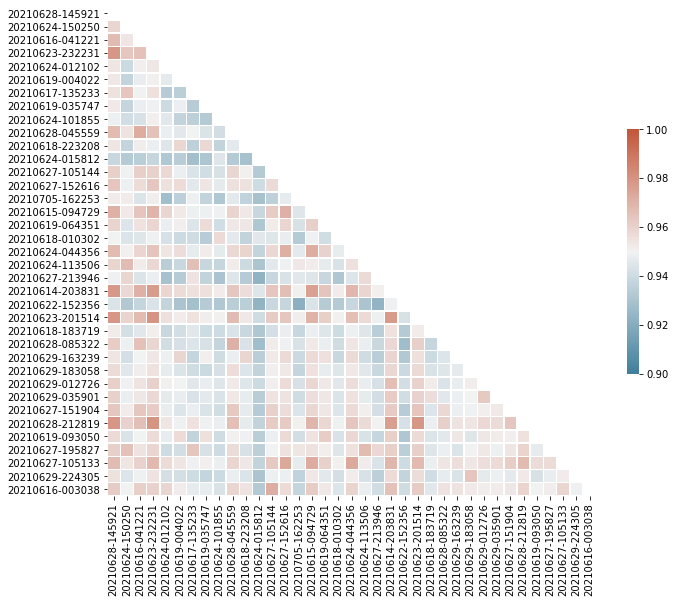

In [26]:
corr = oofs[selection].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.9, vmax=1.0, # center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [27]:
model_folders_current = [
    "20210628-145921",
    "20210624-150250",
    "20210616-041221",
    "20210623-232231",
    "20210624-012102",
    "20210619-004022",
    "20210617-135233",
    "20210619-035747",
    "20210624-101855",
    "20210628-045559",
    "20210618-223208",
    "20210624-015812",
    "20210627-105144",
    "20210627-152616",
    "20210624-113506",
    "20210615-094729",
    "20210624-044356",
    "20210614-203831",
    "20210622-152356",
    "20210628-085322",
    "20210627-213946",
    "20210617-120949",
    "20210619-064351",
    "20210623-201514",
    "20210618-183719",
    "20210628-031447",
    "20210629-183058",
    "20210627-151904",
    "20210616-003038",
    "20210616-132341",
    "20210629-012726",
    "20210629-163239",
    "20210629-035901",
    "20210628-212819",
    "20210627-105133",
    #     "20210627-195827",
    #     "20210619-093050",
    #     "20210629-224305",
]


model_folders_new = [
    "20210628-145921",
    "20210624-150250",
    "20210616-041221",
    "20210623-232231",
    "20210624-101855",
    "20210619-035747",
    "20210624-012102",
    "20210617-135233",
    "20210619-004022",
    "20210628-045559",
    "20210618-223208",
    "20210624-015812",
    "20210627-105144",
    "20210627-152616",
    "20210624-113506",
    "20210615-094729",
    "20210624-044356",
    "20210614-203831",
    "20210622-152356",
    "20210628-085322",
    "20210627-213946",
    "20210617-120949",
    "20210629-012726",
    "20210629-183058",
    "20210618-183719",
    "20210628-031447",
    "20210629-163239",
    "20210629-055338",
    "20210628-212819",
    "20210627-105133",
    "20210627-151904",
    "20210616-003038",
    "20210616-132341",
    "20210627-225949",
#     "20210629-224305",
#     "20210623-201514",
#     "20210628-114738",
#     "20210619-064351",
]

model_folders_current = set(model_folders_current)
model_folders_new = set(model_folders_new)

In [28]:
# Add these. Make colab command
add_list = model_folders_new.difference(model_folders_current)
for d in add_list:
    print(f"upload('{d}')")

upload('20210629-055338')
upload('20210627-225949')


In [29]:
add_list = model_folders_new.difference(model_folders_current)
for d in add_list:
    print(f"https://www.kaggle.com/anjum48/commonlitreadabilityprize-{d}")

https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210629-055338
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210627-225949


In [30]:
# Remove these. Make links
remove_list = model_folders_current.difference(model_folders_new)
for d in remove_list:
    print(f"https://www.kaggle.com/anjum48/commonlitreadabilityprize-{d}")

https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210623-201514
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210619-064351
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210629-035901


# Pruning

Start with everything, and iteratively remove the least informative models

Takes 2.5 hours for 175 models with CV. 11 mins without CV

In [31]:
def score_helper(columns):
    return get_nf_score(oofs[columns], cv=False)

candidates = model_folders.copy()
history = []
score = get_nf_score(oofs[candidates], oofs["target"])

print(f"Initial score {score:0.5f}")

while len(candidates) > 1:
    trial_candidates = [candidates[:i] + candidates[i+1:] for i, _ in enumerate(candidates)]
    scores = [score_helper(tc) for tc in trial_candidates]
    removed = candidates[np.argmin(scores)]
    del candidates[np.argmin(scores)]
    score = get_nf_score(oofs[candidates], oofs["target"])
    size = np.sum([get_size(c) for c in candidates])
    history.append({"models": candidates.copy(), "score": score, "size": size, "removed": removed})
    print(f"{len(history)} New score {score:0.5f}. Size: {size:0.1f} GB. Removed {removed}")
    
history = pd.DataFrame(history)
history.tail(40)

Initial score 0.43328
1 New score 0.43329. Size: 841.7 GB. Removed 20210622-183427
2 New score 0.43326. Size: 835.0 GB. Removed 20210617-083847
3 New score 0.43329. Size: 827.4 GB. Removed 20210623-140343
4 New score 0.43328. Size: 827.1 GB. Removed 20210628-052149
5 New score 0.43328. Size: 818.2 GB. Removed 20210622-161822
6 New score 0.43329. Size: 811.5 GB. Removed 20210627-181626
7 New score 0.43330. Size: 805.3 GB. Removed 20210628-213743
8 New score 0.43325. Size: 800.0 GB. Removed 20210629-112540
9 New score 0.43324. Size: 799.6 GB. Removed 20210617-225903
10 New score 0.43323. Size: 797.6 GB. Removed 20210628-180837
11 New score 0.43322. Size: 795.0 GB. Removed 20210618-233614
12 New score 0.43320. Size: 788.2 GB. Removed 20210624-081031
13 New score 0.43318. Size: 780.7 GB. Removed 20210629-004241
14 New score 0.43318. Size: 780.3 GB. Removed 20210624-040309
15 New score 0.43317. Size: 771.4 GB. Removed 20210622-171312
16 New score 0.43317. Size: 769.1 GB. Removed 20210627-12

133 New score 0.43618. Size: 247.2 GB. Removed 20210624-033624
134 New score 0.43633. Size: 240.5 GB. Removed 20210628-045559
135 New score 0.43639. Size: 233.8 GB. Removed 20210624-131927
136 New score 0.43649. Size: 227.1 GB. Removed 20210617-102611
137 New score 0.43664. Size: 219.5 GB. Removed 20210615-054256
138 New score 0.43679. Size: 219.2 GB. Removed 20210618-051049
139 New score 0.43689. Size: 218.8 GB. Removed 20210628-072849
140 New score 0.43707. Size: 209.9 GB. Removed 20210628-114738
141 New score 0.43714. Size: 201.1 GB. Removed 20210622-181238
142 New score 0.43730. Size: 193.5 GB. Removed 20210623-201514
143 New score 0.43749. Size: 186.9 GB. Removed 20210627-151904
144 New score 0.43761. Size: 184.2 GB. Removed 20210615-105329
145 New score 0.43780. Size: 176.6 GB. Removed 20210619-093050
146 New score 0.43800. Size: 166.1 GB. Removed 20210629-224305
147 New score 0.43820. Size: 165.8 GB. Removed 20210628-031447
148 New score 0.43837. Size: 159.0 GB. Removed 20210627

,models,score,size,removed
139,"[20210614-203831, 20210615-094729, 20210615-10...",0.437069,209.943203,20210628-114738
140,"[20210614-203831, 20210615-094729, 20210615-10...",0.437136,201.087975,20210622-181238
141,"[20210614-203831, 20210615-094729, 20210615-10...",0.437302,193.505640,20210623-201514
142,"[20210614-203831, 20210615-094729, 20210615-10...",0.437488,186.850996,20210627-151904
143,"[20210614-203831, 20210615-094729, 20210615-23...",0.437605,184.242758,20210615-105329
144,"[20210614-203831, 20210615-094729, 20210615-23...",0.437801,176.639269,20210619-093050
145,"[20210614-203831, 20210615-094729, 20210615-23...",0.438000,166.121207,20210629-224305
146,"[20210614-203831, 20210615-094729, 20210615-23...",0.438204,165.759520,20210628-031447
147,"[20210614-203831, 20210615-094729, 20210615-23...",0.438371,159.049019,20210627-195827
148,"[20210614-203831, 20210615-094729, 20210615-23...",0.438539,151.445531,20210619-064351


In [32]:
history.to_csv("pruning.csv", index=False)

In [49]:
idx = 141
print(history.loc[idx, "score"], len(history.loc[140, "models"]), history.loc[idx, "size"])
history.loc[idx, "models"]

0.43730200380463463 39 193.50564027298242


['20210614-203831',
 '20210615-094729',
 '20210615-105329',
 '20210615-234038',
 '20210616-003038',
 '20210616-041221',
 '20210616-132341',
 '20210617-135233',
 '20210618-203441',
 '20210618-223208',
 '20210619-004022',
 '20210619-035747',
 '20210619-064351',
 '20210619-093050',
 '20210622-152356',
 '20210623-110954',
 '20210623-232231',
 '20210624-012102',
 '20210624-015812',
 '20210624-101855',
 '20210624-113506',
 '20210624-150250',
 '20210627-105133',
 '20210627-152616',
 '20210627-105144',
 '20210627-151904',
 '20210628-085322',
 '20210627-195827',
 '20210627-213946',
 '20210628-031447',
 '20210628-145921',
 '20210628-212819',
 '20210629-012726',
 '20210629-035901',
 '20210629-183058',
 '20210629-224305',
 '20210629-163239',
 '20210705-162253']

In [48]:
model_folders_new = set(history.loc[140, "models"])
add_list = model_folders_new.difference(model_folders_current)
for d in add_list:
    print(f"https://www.kaggle.com/anjum48/commonlitreadabilityprize-{d}")

https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210619-093050
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210615-105329
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210623-110954
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210618-203441
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210705-162253
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210627-195827
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210615-234038
https://www.kaggle.com/anjum48/commonlitreadabilityprize-20210629-224305


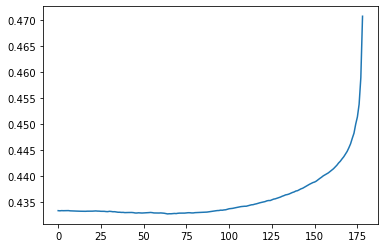

In [35]:
history["score"].plot();